In [1]:
# word2vec

In [2]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [3]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x78aecb53ad70>)

In [7]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)
target_text

In [8]:
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))
parse_text

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)
content_text

Output hidden; open in https://colab.research.google.com to view.

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)
sent_text

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.',
 'Both are necessary, but it can be too much of a good thing.',
 'Consider Facit.',
 "I'm actually old enough to remember them.",
 'Facit was a fantastic company.',
 'They were born deep in the Swedish forest, and they made the best mechanical calculators in the world.',
 'Everybody used them.',
 'And what did Facit do when the electronic calculator came along?',
 'They continued doing exactly the same.',
 'In six months, they went from maximum revenue ... and they were gone.',
 'Gone.',
 'To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.',
 'Facit did too much exploitation.',
 'But exploration can go wild, too.',
 'A few

In [13]:
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [14]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [15]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [16]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [17]:
# Word2Vec의 하이퍼파라미터값은 다음과 같습니다.

# vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.

In [18]:
model_result = model.wv.most_similar("man")
print(model_result)
# 주변에(window크기) 자주 등장하는 단어

[('woman', 0.8472870588302612), ('lady', 0.8017891049385071), ('guy', 0.7979941368103027), ('girl', 0.7595545649528503), ('boy', 0.7552682757377625), ('soldier', 0.7279162406921387), ('gentleman', 0.7122772932052612), ('kid', 0.7070314288139343), ('poet', 0.6845476627349854), ('photographer', 0.6687580347061157)]


In [19]:
model_result = model.wv.most_similar("lady")
print(model_result)

[('gentleman', 0.8324454426765442), ('girl', 0.8107505440711975), ('boy', 0.8076763153076172), ('woman', 0.80698561668396), ('man', 0.8017890453338623), ('guy', 0.7717024683952332), ('soldier', 0.7359642386436462), ('friend', 0.7286310195922852), ('mary', 0.7279581427574158), ('peter', 0.714739203453064)]


In [21]:
model_result = model.wv.most_similar("boy")
print(model_result)

[('girl', 0.9297448396682739), ('kid', 0.8424205183982849), ('lady', 0.807676374912262), ('woman', 0.7866310477256775), ('man', 0.7552682757377625), ('mary', 0.7456745505332947), ('sister', 0.7381722927093506), ('baby', 0.7333048582077026), ('brother', 0.7266412377357483), ('guy', 0.6976209878921509)]


In [22]:
model_result = model.wv.most_similar("sky")
print(model_result)

[('sun', 0.7564874291419983), ('ocean', 0.7298049926757812), ('sea', 0.7289409637451172), ('lake', 0.7155218720436096), ('desert', 0.7090597152709961), ('sand', 0.7042951583862305), ('river', 0.7038279175758362), ('window', 0.7031698226928711), ('mountain', 0.7008553147315979), ('ice', 0.6952104568481445)]


In [26]:
# gensim 검색
model.wv.vectors.shape # (21613, 100)
model.wv.vectors[0]

array([-2.0061316e+00, -1.2497332e+00,  2.5738108e-01,  4.4119537e-01,
        1.4982795e-02, -1.2434509e+00,  2.3438878e-02, -8.4134944e-02,
       -3.3364370e-01,  3.1897429e-01,  1.2684447e-01, -4.8498499e-01,
        6.2735260e-01,  7.1209753e-01, -1.4017149e+00,  2.3647457e-01,
        4.8109561e-01,  9.1692460e-01, -2.1298008e+00, -1.2347076e+00,
        1.2136263e+00,  9.5230877e-01, -5.9584361e-01, -6.1257029e-01,
        2.9976937e-01, -1.5885397e+00, -5.7675540e-01,  5.1112396e-01,
        1.3777162e+00, -1.3672940e-01, -1.6249023e-01, -3.4018612e-01,
        7.6266789e-01, -1.9367493e+00,  2.3540251e-01, -6.0355520e-01,
       -3.9902711e-01, -1.4458719e+00, -4.7316432e-01, -1.0220412e+00,
       -6.5515113e-01,  3.0579838e-01, -1.0161926e+00, -1.3711141e+00,
        6.0573411e-01,  1.4657535e-01, -5.0795633e-01, -4.9734864e-02,
        8.4952343e-01, -1.6567328e+00, -3.0528650e-01,  9.4591576e-01,
        3.1499678e-01,  6.3639539e-01, -3.4588441e-01,  4.7429845e-01,
      

In [29]:
model.wv.get_vector("king")

array([-0.03886455, -1.3258977 ,  1.0182273 , -0.6243653 ,  1.3719871 ,
       -0.13216478,  0.41275835,  0.49612987,  0.21914284,  0.7441255 ,
       -0.6226288 , -0.13275227, -0.34626317,  0.05548093,  0.88412166,
       -0.89077055,  0.22797133, -0.8418253 , -0.22352059, -1.1701127 ,
        0.45302072,  0.5487186 ,  0.7926558 ,  0.21099539,  0.892313  ,
        0.20073216,  0.17306608, -0.18309802, -0.29631498,  0.20435067,
        0.53663796,  0.5617073 ,  0.35856792,  0.459442  ,  0.2389332 ,
        0.34037033, -1.0591273 , -0.3683066 , -0.7749907 ,  0.04829747,
        1.098853  , -0.9907195 , -0.3292188 ,  0.19251361,  0.5008534 ,
       -0.55813235,  0.1204294 , -0.71554345, -0.5865271 , -0.04196586,
        0.06191548, -1.4237055 ,  0.89757   ,  0.45575806,  0.1806103 ,
       -0.12509066,  0.10720044, -0.21923672, -0.98451316, -0.11965738,
       -0.05590143,  0.16199115,  0.9769205 , -0.1446116 , -0.7801742 ,
        0.21457298,  0.6154782 , -0.0838267 , -0.48518538, -0.20

In [30]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [31]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8472870588302612), ('lady', 0.8017891049385071), ('guy', 0.7979941368103027), ('girl', 0.7595545649528503), ('boy', 0.7552682757377625), ('soldier', 0.7279162406921387), ('gentleman', 0.7122772932052612), ('kid', 0.7070314288139343), ('poet', 0.6845476627349854), ('photographer', 0.6687580347061157)]


In [32]:
# 한국어 word2vec

In [34]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 34.7 MB/s eta 0:00:00


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [36]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x78ae8daa97e0>)

In [37]:
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [38]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [39]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [42]:
train_data.isnull().values.any() # True : null이 있음

True

In [43]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [44]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [47]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # , 제거 안됨 이유?

In [53]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True) # 제거 정상작동

In [54]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [50]:
pip install tqdm

In [55]:
from tqdm import tqdm

In [56]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [17:11<00:00, 193.98it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


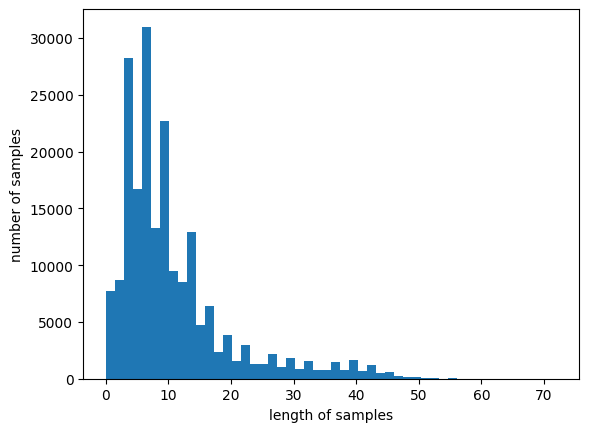

In [57]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [58]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [59]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [60]:
print(model.wv.most_similar("최민식"))

[('안성기', 0.8659965991973877), ('이정재', 0.8467010855674744), ('최민수', 0.833839476108551), ('김명민', 0.8324768543243408), ('이민호', 0.8210116624832153), ('송강호', 0.8203157186508179), ('한석규', 0.8166585564613342), ('설경구', 0.8158634901046753), ('단역', 0.814339280128479), ('윤제문', 0.8132725358009338)]


In [61]:
print(model.wv.most_similar("히어로"))

[('무협', 0.8639410734176636), ('슬래셔', 0.8599247336387634), ('느와르', 0.8563637733459473), ('호러', 0.8466593623161316), ('물의', 0.8364724516868591), ('교과서', 0.8108820915222168), ('물', 0.8000972270965576), ('블록버스터', 0.7960816621780396), ('무비', 0.7934699058532715), ('블랙', 0.7928788661956787)]


In [62]:
# 현재 다운로드 x
# import gensim
# import urllib.request

# # 구글의 사전 훈련된 Word2Vec 모델을 로드.
# urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
#                            filename="GoogleNews-vectors-negative300.bin.gz")
# word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [63]:
# print(word2vec_model.vectors.shape)

In [64]:
# print(word2vec_model.similarity('this', 'is')) # api문서,gensim word2vec_model 관련해서 similarity 확인(유사도)
# print(word2vec_model.similarity('post', 'book'))

In [65]:
# print(word2vec_model['book'])

In [66]:
# FastText

In [68]:
# model.wv.most_similar("electrofishing")
# KeyError: "Key 'electrofishing' not present in vocabulary"

In [70]:
pip install FastText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for FastText: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246765 sha256=859033bba7c4e3c2cb134dcf5590fdb005b38386471274eb6233bb0a81a9832b
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built FastText


In [72]:
from gensim.models import FastText

model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

KeyboardInterrupt: 

In [ ]:
model.wv.most_similar("electrofishing")

In [ ]:
# 한국어 FastText

In [73]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 6.68 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-07-11 02:25:37--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.1, 18.205.93.0, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20fi

In [76]:
# 한글 자모 단위 처리 패키지 설치
!pip install hgtk

In [77]:
# fasttext 설치
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!pip install .

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1057/1057), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 3998 (delta 922), reused 884 (delta 856), pack-reused 2941
Receiving objects: 100% (3998/3998), 8.30 MiB | 21.46 MiB/s, done.
Resolving deltas: 100% (2529/2529), done.
/content/Mecab-ko-for-Google-Colab/fastText
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pt

In [78]:
import re
import pandas as pd
import urllib.request
from tqdm import tqdm
import hgtk
from konlpy.tag import Mecab

In [79]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x78ae5ea724d0>)

In [80]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [81]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [82]:
# 한글인지 체크
hgtk.checker.is_hangul('ㄱ')

True

In [83]:
# 한글인지 체크
hgtk.checker.is_hangul('28')

False

In [84]:
# 음절을 초성, 중성, 종성으로 분해
hgtk.letter.decompose('남')

('ㄴ', 'ㅏ', 'ㅁ')

In [85]:
# 초성, 중성을 결합
hgtk.letter.compose('ㄴ', 'ㅏ')

'나'

In [86]:
# 초성, 중성, 종성을 결합
hgtk.letter.compose('ㄴ', 'ㅏ', 'ㅁ')

'남'

In [88]:
# 한글이 아닌 입력에 대해서는 에러 발생.
hgtk.letter.decompose('1')
# 결합불가
hgtk.letter.compose('ㄴ', 'ㅁ')

NotHangulException: 

In [89]:
def word_to_jamo(token):
  def to_special_token(jamo):
    if not jamo:
      return '-'
    else:
      return jamo

  decomposed_token = ''
  for char in token:
    try:
      # char(음절)을 초성, 중성, 종성으로 분리
      cho, jung, jong = hgtk.letter.decompose(char)

      # 자모가 빈 문자일 경우 특수문자 -로 대체
      cho = to_special_token(cho)
      jung = to_special_token(jung)
      jong = to_special_token(jong)
      decomposed_token = decomposed_token + cho + jung + jong

    # 만약 char(음절)이 한글이 아닐 경우 자모를 나누지 않고 추가
    except Exception as exception:
      if type(exception).__name__ == 'NotHangulException':
        decomposed_token += char

  # 단어 토큰의 자모 단위 분리 결과를 추가
  return decomposed_token

In [90]:
word_to_jamo('남동생')

'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

In [92]:
# mecab = Mecab() # 에러, 런타임 재실행 필요
okt = Okt()

In [93]:
print(okt.morphs('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['선물', '용', '으로', '빨리', '받아서', '전달', '했어야', '하는', '상품', '이었는데', '머그컵', '만', '와서', '당황', '했습니다', '.']


In [95]:
def tokenize_by_jamo(s):
    return [word_to_jamo(token) for token in okt.morphs(s)]

In [96]:
print(tokenize_by_jamo('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['ㅅㅓㄴㅁㅜㄹ', 'ㅇㅛㅇ', 'ㅇㅡ-ㄹㅗ-', 'ㅃㅏㄹㄹㅣ-', 'ㅂㅏㄷㅇㅏ-ㅅㅓ-', 'ㅈㅓㄴㄷㅏㄹ', 'ㅎㅐㅆㅇㅓ-ㅇㅑ-', 'ㅎㅏ-ㄴㅡㄴ', 'ㅅㅏㅇㅍㅜㅁ', 'ㅇㅣ-ㅇㅓㅆㄴㅡㄴㄷㅔ-', 'ㅁㅓ-ㄱㅡ-ㅋㅓㅂ', 'ㅁㅏㄴ', 'ㅇㅘ-ㅅㅓ-', 'ㄷㅏㅇㅎㅘㅇ', 'ㅎㅐㅆㅅㅡㅂㄴㅣ-ㄷㅏ-', '.']


In [98]:
tokenized_data = []

for sample in tqdm(total_data['reviews'].to_list()):
    tokenzied_sample = tokenize_by_jamo(sample) # 자소 단위 토큰화
    tokenized_data.append(tokenzied_sample)

100%|██████████| 200000/200000 [27:55<00:00, 119.37it/s]


In [99]:
def jamo_to_word(jamo_sequence):
  tokenized_jamo = []
  index = 0

  # 1. 초기 입력
  # jamo_sequence = 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

  while index < len(jamo_sequence):
    # 문자가 한글(정상적인 자모)이 아닐 경우
    if not hgtk.checker.is_hangul(jamo_sequence[index]):
      tokenized_jamo.append(jamo_sequence[index])
      index = index + 1

    # 문자가 정상적인 자모라면 초성, 중성, 종성을 하나의 토큰으로 간주.
    else:
      tokenized_jamo.append(jamo_sequence[index:index + 3])
      index = index + 3

  # 2. 자모 단위 토큰화 완료
  # tokenized_jamo : ['ㄴㅏㅁ', 'ㄷㅗㅇ', 'ㅅㅐㅇ']

    word = ''
  try:
    for jamo in tokenized_jamo:

      # 초성, 중성, 종성의 묶음으로 추정되는 경우
      if len(jamo) == 3:
        if jamo[2] == "-":
          # 종성이 존재하지 않는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1])
        else:
          # 종성이 존재하는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1], jamo[2])
      # 한글이 아닌 경우
      else:
        word = word + jamo

  # 복원 중(hgtk.letter.compose) 에러 발생 시 초기 입력 리턴.
  # 복원이 불가능한 경우 예시) 'ㄴ!ㅁㄷㅗㅇㅅㅐㅇ'
  except Exception as exception:
    if type(exception).__name__ == 'NotHangulException':
      return jamo_sequence

  # 3. 단어로 복원 완료
  # word : '남동생'

  return word

In [100]:
jamo_to_word('ㄴㅏㅁㄷㅗㅇㅅㅐㅇ')

'남동생'

In [101]:
import fasttext

In [102]:
with open('tokenized_data.txt', 'w') as out:
  for line in tqdm(tokenized_data, unit=' line'):
    out.write(' '.join(line) + '\n')

100%|██████████| 200000/200000 [00:00<00:00, 344677.02 line/s]


In [103]:
model = fasttext.train_unsupervised('tokenized_data.txt', model='cbow')

In [104]:
model.save_model("fasttext.bin")

In [105]:
model = fasttext.load_model("fasttext.bin")

In [106]:
model[word_to_jamo('남동생')] # 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

array([ 0.35380462, -0.807614  ,  0.3628763 ,  0.11574883, -1.2608422 ,
        0.08219978, -0.08667767, -0.37001944, -0.28969797, -0.42467433,
       -1.0015416 ,  0.4336362 ,  0.22647247, -0.96984786, -0.95339173,
       -0.86498106, -0.05074009,  0.26520798,  0.2424494 ,  0.42746577,
        0.7131708 , -1.2371721 ,  0.20706281, -0.8989596 , -0.07427146,
       -0.13251068, -0.57252383,  0.5012452 , -0.12259769,  0.8256774 ,
       -0.55684876,  0.21866424, -0.30242467,  0.6198016 , -1.2894096 ,
        0.02635064, -0.00934638,  0.88234603, -0.8820059 ,  0.8035719 ,
       -0.954079  ,  0.13009655, -0.52867496,  0.9520975 ,  0.60449445,
       -1.19966   ,  0.00505545, -0.01011183, -0.335707  ,  0.32756683,
       -0.2941417 , -0.4977707 ,  0.65173924, -1.2510427 ,  0.21521677,
        0.00228714,  0.44254264, -0.59608   ,  1.0559834 , -0.76976776,
        0.14678918,  0.18429402,  0.49760452, -1.0451971 ,  0.52300066,
       -0.0869847 ,  0.20501417,  0.37068972, -0.71735686, -0.03

In [107]:
model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)

[(0.852977991104126, 'ㄷㅗㅇㅅㅐㅇ'),
 (0.8458957076072693, 'ㄴㅏㅁㅊㅣㄴ'),
 (0.8088912963867188, 'ㄴㅏㅁㅈㅏ-ㅊㅣㄴㄱㅜ-'),
 (0.8079398274421692, 'ㄴㅏㅁㅍㅕㄴ'),
 (0.7330173850059509, 'ㄴㅏㄴㅅㅐㅇ'),
 (0.6957447528839111, 'ㅊㅣㄴㄱㅜ-'),
 (0.6865520477294922, 'ㅊㅣㄴㅈㅓㅇㅇㅓㅁㅁㅏ-'),
 (0.6855951547622681, 'ㅇㅓㅁㅁㅏ-'),
 (0.6841498613357544, 'ㅅㅐㅇㅅㅣㄴ'),
 (0.6763693690299988, 'ㅊㅗ-ㄷㅡㅇㅅㅐㅇ')]

In [108]:
def transform(word_sequence):
  return [(jamo_to_word(word), similarity) for (similarity, word) in word_sequence]

In [109]:
print(transform(model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))

[('동생', 0.852977991104126), ('남친', 0.8458957076072693), ('남자친구', 0.8088912963867188), ('남편', 0.8079398274421692), ('난생', 0.7330173850059509), ('친구', 0.6957447528839111), ('친정엄마', 0.6865520477294922), ('엄마', 0.6855951547622681), ('생신', 0.6841498613357544), ('초등생', 0.6763693690299988)]


In [110]:
# 행렬연산때 gpu 고려